### About the dataset (Adult Income Data)

The dataset contains information about the individuals' age, gender, and several attributes affecting the income of a person. <br> Attribute information:

**age:** Age of an individual

**workclass:** Working class of the individual

**fnlwgt:** Weights based on the demographic characteristics

**education:** Highest education of the individual

**education.num:** Education encoded with unique numbers

**marital.status:** Marital status of the individual

**occupation:** Occupation of the individual

**relationship:** Relation of the individual in the family

**race:** Race of the individual

**sex:** Gender of the individual (0 = Male, 1 = Female)

**capital.gain:** Gain amount of the individual

**capital.loss:** Loss amount of the individual

**hours.per.week:** Working hours per week

**native.country:** The native country of the individual

**income:** Income of the individual

##  Table of Content

1. **[Understand the Dataset](#data)**
2. **[Measures of Central Tendency](#ct)**
3. **[Measures of Dispersion](#md)**
4. **[Distribution of the Data](#dist)**
5. **[Skewness and kurtosis](#sk)**
6. **[Correlation](#corr)**

**Import the required libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Load the adults income dataset and print first five observations**

In [2]:
df=pd.read_csv('adult_income.csv')
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,1,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,1,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,1,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,1,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,1,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,0,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,1,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,0,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,1,0,0,40,United-States,<=50K


In [3]:
# rename the column name
df.rename(columns={'education.num':'education_num','marital.status':'marital_status',
                   'capital.gain':'capital_gain','capital.loss':'capital_loss','hours.per.week':'hours_per_week',
                  'native.country':'native_country'},inplace=True)

In [4]:
# replace the values
df['workclass'] = df['workclass'].replace({'?': 'Private'})
df['occupation']=df['occupation'].replace({'?':'Prof-specialty'})
df['income']=df['income'].replace({'<=50K':'Less than equal to 50K','>50K':'Greater than 50K'})
df['sex']=df['sex'].replace({0:'Male',1:'Female'})

In [5]:
df['workclass']=df['workclass'].replace({'Self-emp-not-inc':'Self_emp_not_inc',
                                         'Local-gov':'Local_gov','State-gov':'State_gov',
                                        'Self-emp-inc':'Self_emp_inc','Federal-gov':'Federal_gov',
                                        'Without-pay':'Without_pay','Never-worked':'Never_worked'})
df['education']=df['education'].replace({'HS-grad':'HS_grad','Some-college':'Some_college','Assoc-voc':'Assoc_voc','Assoc-acdm':'Assoc_acdm',
                                         '7th-8th':'7th_8th','Prof-school':'Prof_school','5th-6th':'5th_6th','1st-4th':'1st_4th'})
df['marital_status']=df['marital_status'].replace({'Married-civ-spouse':'Married_civ_spouse','Never-married':'Never_married',
                                                   'Married-spouse-absent':'Married_spouse_absent','Married-AF-spouse':'Married_AF_spouse'})
df['occupation']=df['occupation'].replace({'Prof-specialty':'Prof_specialty','Craft-repair':'Craft_repair','Exec-managerial':'Exec_managerial',
                                          'Adm-clerical':'Adm_clerical','Other-service':'Other_service','Machine-op-inspct':'Machine_op_inspct',
                                          'Transport-moving':'Transport_moving','Handlers-cleaners':'Handlers_cleaners',
                                           'Farming-fishing':'Farming_fishing','Tech-support':'Tech_support','Protective-serv':'Protective_serv',
                                           'Priv-house-serv':'Priv_house_serv','Armed-Forces':'Armed_Forces'})
df['relationship']=df['relationship'].replace({'Not-in-family':'Not_in_family','Own-child':'Own_child','Other-relative':'Other_relative'})
df['race']=df['race'].replace({'Asian-Pac-Islander':'Asian_Pac_Islander','Amer-Indian-Eskimo':'Amer_Indian_Eskimo'})
df['native_country']=df['native_country'].replace({'United-States':'United States','Puerto-Rico':'Puerto Rico','El-Salvador':'El Salvador',
                                                   'Dominican-Republic':'Dominican Republic','Trinadad&Tobago':'Trinadad & Tobago',
                                                   'Outlying-US(Guam-USVI-etc)':'Outlying_US(Guam_USVI_etc)','Holand-Netherlands':'Holand_Netherlands'})

### Let's begin with some hands-on practice exercises

<a id="data"> </a>
## 1. Understand the Dataset

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Find out the numerical and categorical variables in the data. If any variable is wrongly identified, do the needful
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [6]:
Numerical=df.select_dtypes(include=np.number)
Numerical.head(2)

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,90,77053,9,0,4356,40
1,82,132870,9,0,4356,18


In [7]:
Category=df.select_dtypes(exclude=np.number)
Category.head(2)

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,Private,HS_grad,Widowed,Prof_specialty,Not_in_family,White,Female,United States,Less than equal to 50K
1,Private,HS_grad,Widowed,Exec_managerial,Not_in_family,White,Female,United States,Less than equal to 50K


**Interpretation:** Refer to the data and check whether the data has been correctly identified. Now based on the result, classify the various data columns into numerical/categorical attributes:

**Numerical Attributes:** age, fnlwgt, education_num, capital_gain, capital_loss, hours_per_week
**Categorical Attributes:** workclass, education, marital_status, occupation, relationship, race, sex, native_country,income

<a id="ct"> </a>
## 2. Measures of Central Tendency

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. What is the average age of males and females in the data?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [8]:
avg_age=df.groupby('sex')['age'].mean().round(2)
avg_age.to_frame().sort_values(by = 'age',ascending = False)

,age
sex,
Male,39.43
Female,36.86


**Interpretation:** The result based on the average age of male and female.In this male average age is 36.86 and female average age is 39.43.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. What is the value under which 95% of the capital gain would lie? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [9]:
df.capital_gain.quantile(0.95)

np.float64(5013.0)

**Interpretation:**  The 95th Percentile is 5013.0 which the value would lie for the captial gain

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Identify the qualification of most of the individuals </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [10]:
df['education'] .value_counts().nlargest(1).to_frame()

,count
education,
HS_grad,10501


**Interpretation:** The most individual of the qualifications is Higher secondary graduates is 10501 people were completed.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Find the middle most observation of age for different working class</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [11]:
df.groupby(['workclass'])['age'].median().to_frame()

,age
workclass,
Federal_gov,43.0
Local_gov,41.0
Never_worked,18.0
Private,35.0
Self_emp_inc,45.0
Self_emp_not_inc,44.0
State_gov,39.0
Without_pay,57.0


**Interpretation:**
- Without pay workers are the oldest — around 57 years old.
- Self-employed people are also older — around 44 to 45 years.
- Government workers are in their late 30s to early 40s.
- Private sector workers are younger — around 35 years.
- People who never worked are the youngest — around 18 years.


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Compare the mean and trimmed mean of capital gain and comment on the presence of outliers</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [12]:
import numpy as np
import scipy
from scipy import stats

In [13]:
captial_gain=df.capital_gain.mean()
captial_gain.round(3)

np.float64(1077.649)

In [14]:
scipy.stats.trim_mean(df['capital_gain'], proportiontocut = 0.20).round(2)

np.float64(0.0)

**Interpretation:** 
- Mean (1077.65): This is the average capital gain, but a few people with very high gains.

- Trimmed Mean (0.0): This removes the top and bottom 20% of values. Most people have zero gain, so the average becomes zero.


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. What is the percentage of the Asian-Pac-Islander race people in the data? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [15]:
total_count = len(df)
asian_pac_count = (df['race'] == 'Asian_Pac_Islander').sum()
percentage = (asian_pac_count / total_count) * 100
df_percentage = pd.DataFrame({
    'Race':['Asian_Pac_Islander'],
    'percentage - (%)':[percentage]
})
df_percentage.round(2).astype(str) + ' %'

,Race,percentage - (%)
0,Asian_Pac_Islander %,3.19 %


**Interpretation:** 3.19 is the percentage of the Asian-Pac-Islander race people in the data

<a id="md"> </a>
## 3. Measures of Dispersion

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Which occupation has more variability in the working hours</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [16]:
variability = df.groupby('occupation')['hours_per_week'].std().reset_index()
variability.sort_values(by = 'hours_per_week',ascending=False).head(3).round(3)

,occupation,hours_per_week
4,Farming_fishing,17.320
8,Priv_house_serv,16.185
9,Prof_specialty,14.213


**Interpretation:** Compared to other occupations based on hours_per_week, Farming/Fishing shows the highest variability, with a standard deviation of 17.32 hours.


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> 9. What is the range of the middle 50% of working hours per week?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [17]:
Q1=df.hours_per_week.quantile(0.25)
Q3=df.hours_per_week.quantile(0.75)

IQR = Q3 - Q1

middle = pd.DataFrame({
    'Range':['Q1-Range','Q3-Range','Inter Quartile Range'],
    'Proportions':[Q1,Q3,IQR]
})
middle

,Range,Proportions
0,Q1-Range,40.0
1,Q3-Range,45.0
2,Inter Quartile Range,5.0


**Interpretation:** 5.0 is range of middle  50 % of working hours per week 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Are there any variables which can be excluded from further analysis based on their variability?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [18]:
# type your code hear
low_variability = df.columns[df.nunique()<=1]
low_variability

Index([], dtype='object')

#### **Interpretation:**

- It can be excluded from further analysis based on their variability , as of my knowledge thare are no variables in our data.
- there are equally dominant on the our data.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Find the percentage of variation in work hours for each workclass. Give an appropriate interpretation</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [19]:
# type your code here
percentage_var = df.groupby('workclass')['hours_per_week'].agg(['mean','std'])

percentage_var[' % variation'] = (percentage_var['std'] / percentage_var['mean']*100)

#percentage_var = pd.DataFrame(percentage_var[' % variation'])
percentage_var.sort_values(by = ' % variation',ascending = False).round(2)

,mean,std,% variation
workclass,,,
Without_pay,32.71,17.36,53.06
Self_emp_not_inc,44.42,16.67,37.54
State_gov,39.03,11.70,29.97
Private,39.64,11.78,29.71
Self_emp_inc,48.82,13.90,28.47
Local_gov,40.98,10.77,26.28
Federal_gov,41.38,8.84,21.36
Never_worked,0.00,0.00,NaN


<a id="dist"> </a>
## 4. Distribution of the Data

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Define a function to plot the categories of the variable and find the category with highest frequency</b>
                </font>
            </div>
        </td>
    </tr>
</table>

'HS_grad'

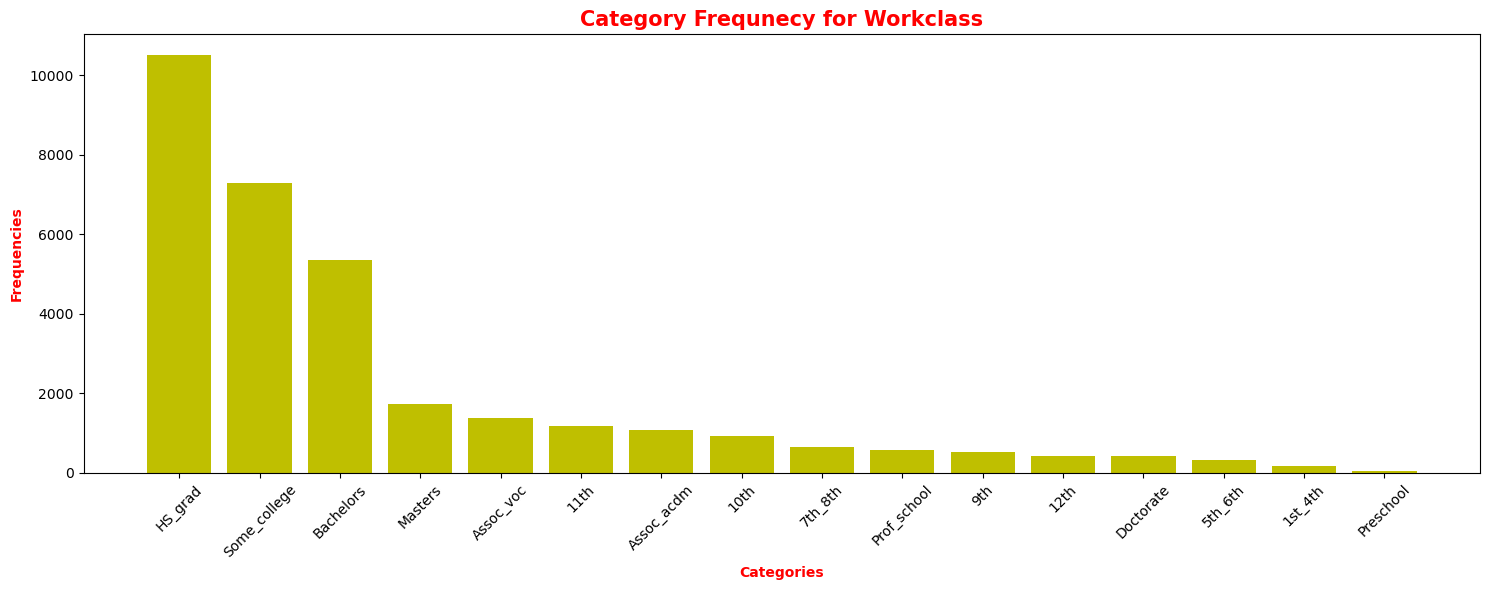

In [20]:
# type your code here
import matplotlib.pyplot as plt
import seaborn as sns

counts = df['education'].value_counts()
plt.figure(figsize = (15,6))
plt.bar(x =counts.index,height =counts.values,color = 'y')

plt.title('Category Frequnecy for Workclass',fontweight = 'bold',color = 'r',fontsize= 15)
plt.ylabel('Frequencies',fontweight = 'bold',color = 'r',fontsize= 10)
plt.xlabel('Categories',fontweight = 'bold',color = 'r',fontsize= 10)
plt.xticks(rotation = 45)

plt.tight_layout()


top_frequency = counts.idxmax()
top_frequency

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Is there any variable which is normally distributed?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

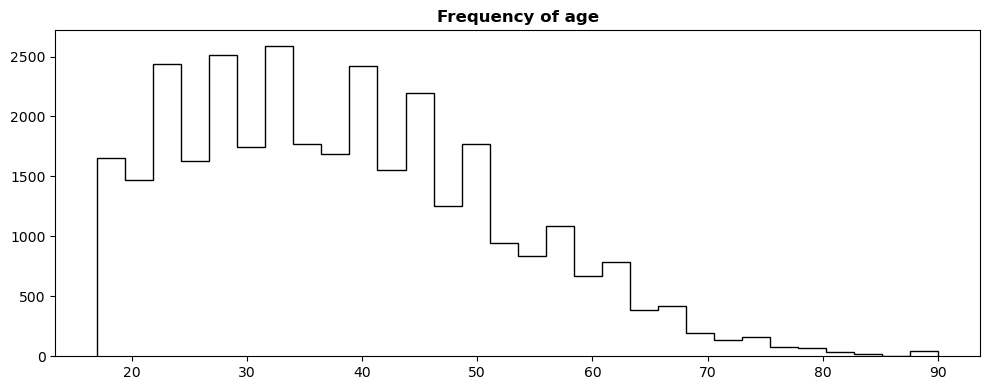

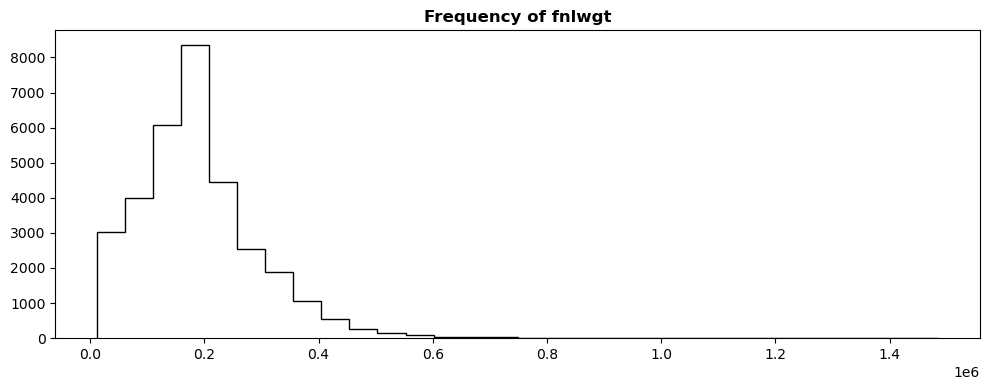

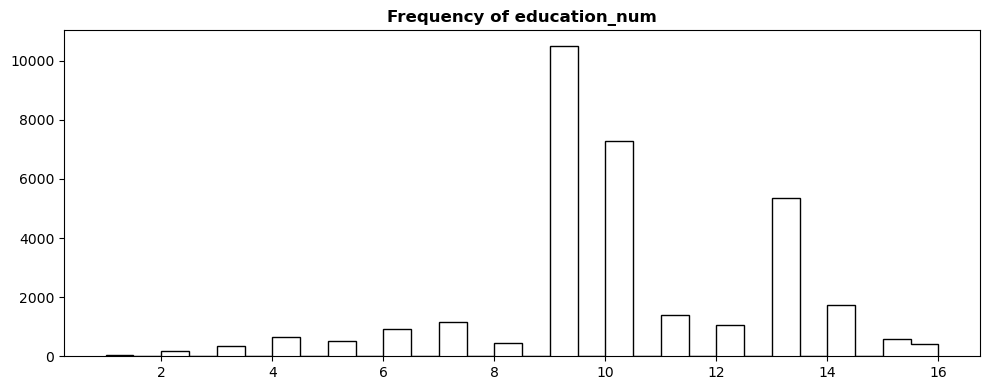

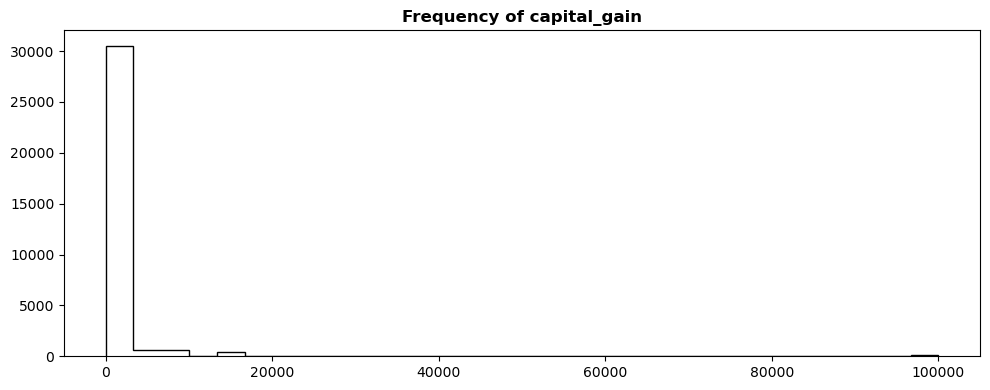

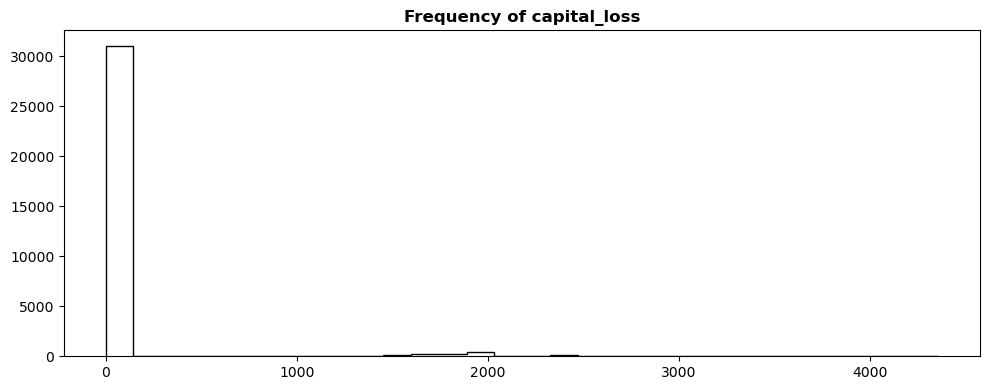

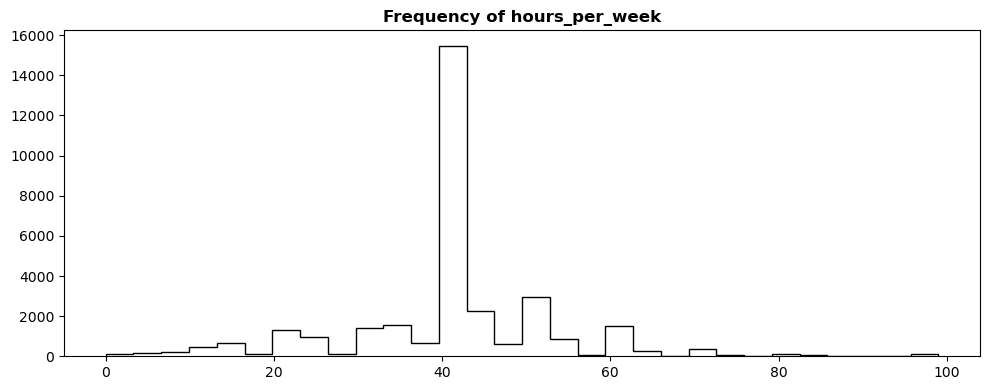

In [21]:
# type your code hear
numerical_cols = df.select_dtypes (include = ['int64', 'float64' ]). columns
for col in numerical_cols: 
    plt.figure(figsize=(10, 4))
    plt.hist(df[col], bins = 30, color = 'black',histtype='step')
    plt.title(f"Frequency of {col}", fontweight='bold')
    plt.tight_layout()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Identify the working class for most of the population in the data</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [22]:
# type your code here
print(f"The working class for most of the population in the data are : {df.workclass.value_counts().idxmax()}")

The working class for most of the population in the data are : Private


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. For how much time are most of the individuals working per week?
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [23]:
# type your code here
print(f"Most of the individuals working per week are : {df.hours_per_week.mode()[0]} hours⏱️")

Most of the individuals working per week are : 40 hours⏱️


<a id="sk"> </a>
## 5. Skewness and kurtosis

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Is there any negatively skewed feature. Support your answer with a metric and the plot</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [24]:
# type your code here
Numerical.skew().to_frame('Positive / Negative / No-skew').round(2)

,Positive / Negative / No-skew
age,0.56
fnlwgt,1.45
education_num,-0.31
capital_gain,11.95
capital_loss,4.59
hours_per_week,0.22


### ** Interpretation:**
- positive skewness ----> skewness > 0
- negative skewness ----> skewness < 0
- no skewness / Roughly ----> skewness = 0

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Find the kurtosis of all the variables, and give appropriate interpretation</b>
                </font>
            </div>
        </td>
    </tr>
</table>

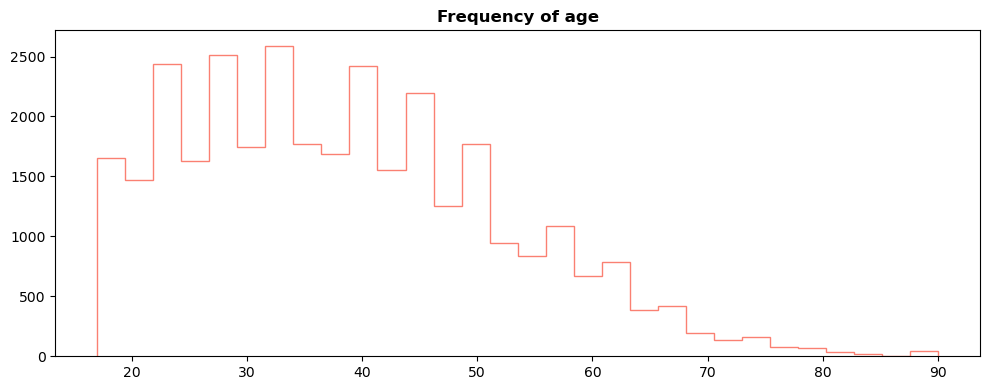

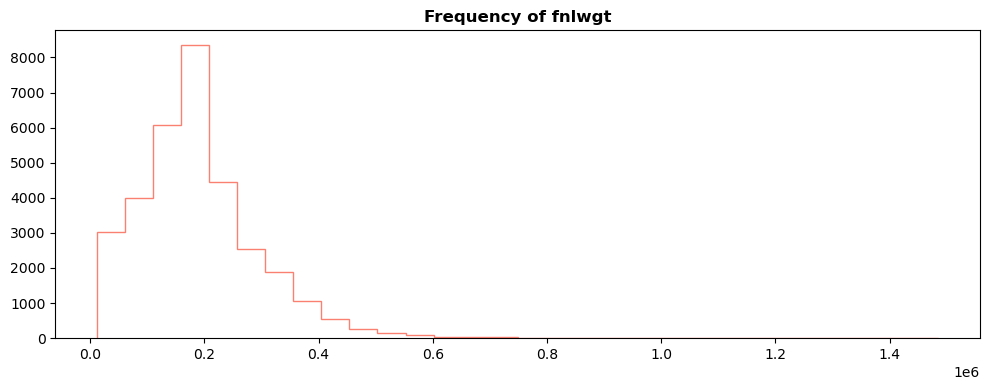

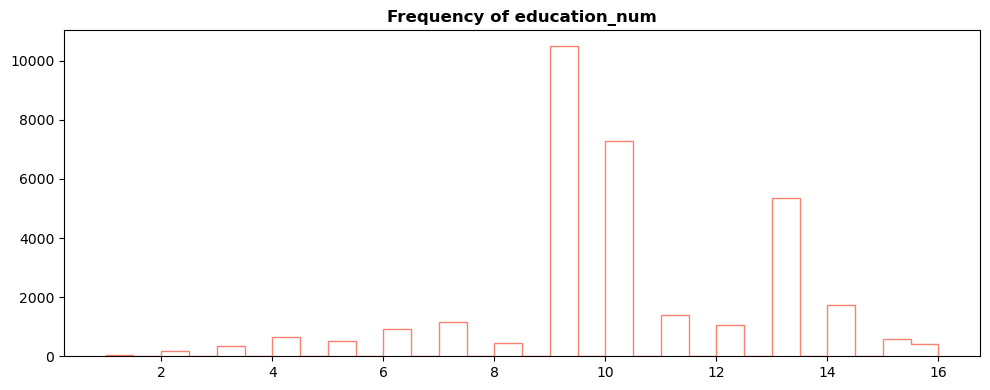

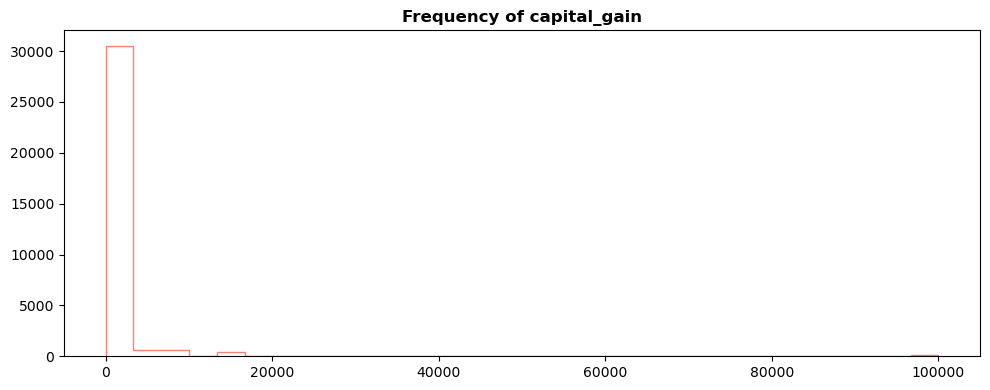

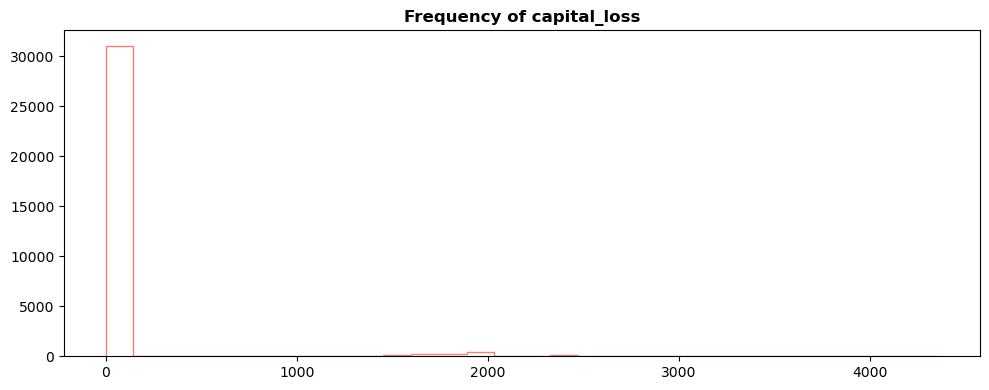

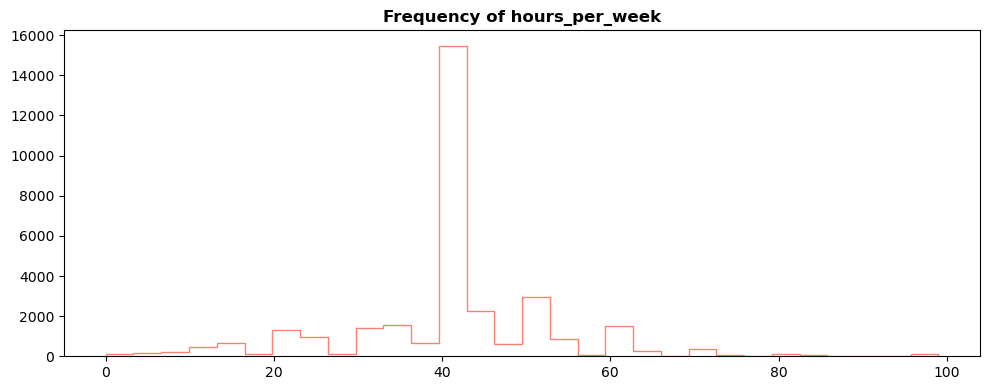

In [25]:
# type your code here
numerical_cols = df.select_dtypes (include = ['int64', 'float64' ]). columns
for col in numerical_cols: 
    plt.figure(figsize=(10, 4))
    plt.hist(df[col], bins = 30, color = 'salmon',histtype = 'step')
    plt.title(f"Frequency of {col}", fontweight='bold')
    plt.tight_layout()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Identify the presence of extreme values in age using visualization techniques
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<Axes: xlabel='age', ylabel='Count'>

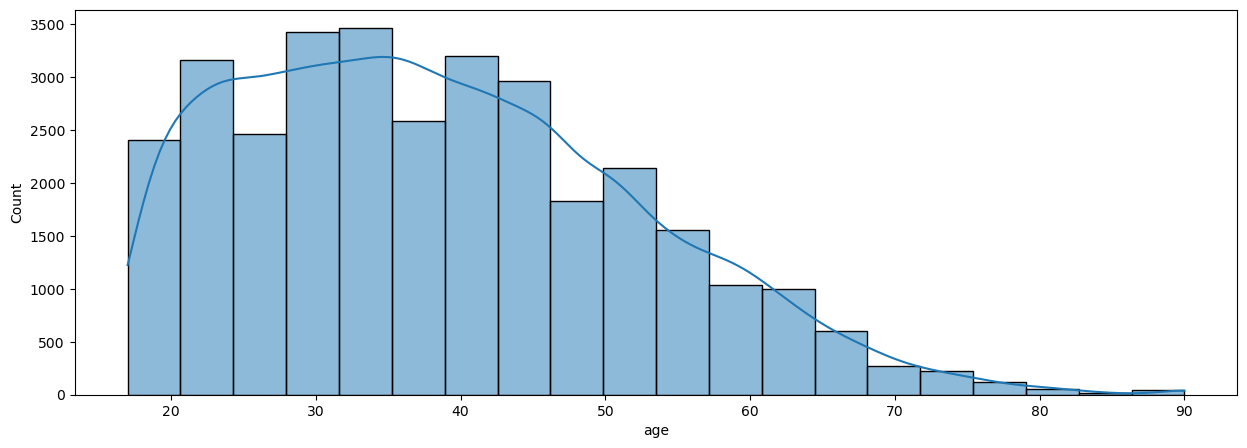

In [26]:
# type your code here
Numerical.kurtosis()
plt.figure(figsize=(15,5))
sns.histplot(df['age'],kde=True,bins=20)

<a id="corr"> </a>
## 6. Correlation

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Is there any effect of age on the working hours of a person?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [27]:
# type your code here
print(f"correlation value = {df.age.corr(df.hours_per_week).round(2)}")

correlation value = 0.07


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Visualize the upper triangular correlation matrix</b>
                </font>
            </div>
        </td>
    </tr>
</table>

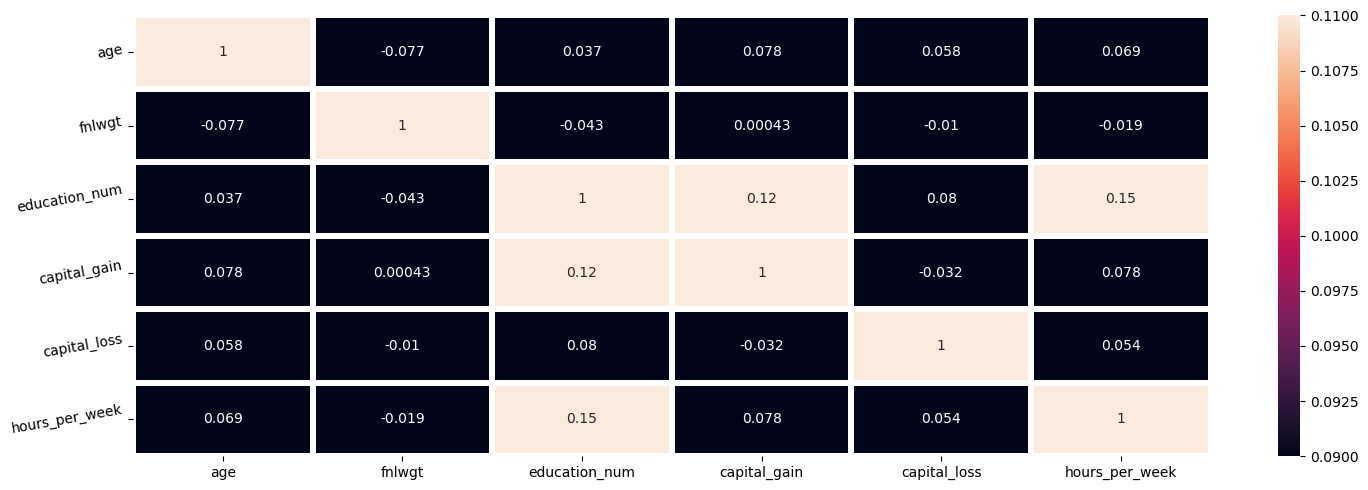

In [28]:
# type your code here
corr = Numerical.corr()

plt.figure(figsize = (15,5))
sns.heatmap(corr,annot = True,
           vmin = .1,
           vmax = .1,lw =3)
plt.yticks(rotation = 10)
plt.tight_layout()

In [40]:
# pd.get_dummies(df,columns = ['marital_status']).head()

In [1]:
#df.marital_status.value_counts()

In [2]:
# pd.get_dummies(df,columns = ['age']).head()

In [3]:
#df.marital_status.value_counts()

In [4]:
#df.columns

In [5]:
#df.capital_loss.value_counts()

In [7]:
# from sklearn.preprocessing import OneHotEncoder

#Encode = OneHotEncoder()

#df_Encode = pd.DataFrame(Encode.fit_transform(df[['income']]).toarray(),columns = [
 #  'Less than equal to 50K','Greater than 50K'
#])

#df_Encode = pd.concat([df,df_Encode],axis = 1)

#df_Encode.head(5)

In [9]:
#df['marital_status']= df['marital_status'].astype(str)